# Cancer Classification with Feature Selection

## Imports

In [ ]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
sc = StandardScaler()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### For Model Evaluation

In [ ]:
def evaluate_fn(Y_test,model_pred):
    # cm = confusion_matrix(Y_test.argmax(), model_pred.argmax())
    cm = confusion_matrix(Y_test.astype(int).tolist(), model_pred)

    True_Positives = cm[0][0]
    False_Positives = cm[0][1]

    True_Negetives = cm[1][1]
    False_Negetives = cm[1][0]

    # return True_Positives,False_Positives,False_Negetives,True_Negetives

    precision =  True_Positives / (True_Positives + False_Positives)
    recall = True_Positives / (True_Positives + False_Negetives)
    f1_score = 2*(precision * recall) / (precision + recall)

    return precision,recall,f1_score

## Working with Microarray Dataset

### Data Preparation For Microarray Dataset

In [ ]:
from scipy.io import arff
import pandas as pd

In [ ]:
data1 = arff.loadarff('/content/drive/MyDrive/Work Space/Breast.arff')
data1 = pd.DataFrame(data1[0])
data1.head()

As you can see here we have too many features i.e 24482

In [ ]:
data1.columns

Index(['Contig45645_RC', 'Contig44916_RC', 'D25272', 'J00129',
       'Contig29982_RC', 'Contig26811', 'D25274', 'Contig36292', 'Contig42854',
       'Contig34839',
       ...
       'NM_000898', 'NM_000899', 'Contig20164_RC', 'Contig8985_RC',
       'Contig36062_RC', 'Contig35333_RC', 'Contig62037_RC', 'AF067420',
       'Contig15167_RC', 'Class'],
      dtype='object', length=24482)

In [ ]:
# check for any null values
data1.isnull().sum()

Contig45645_RC    0
Contig44916_RC    0
D25272            0
J00129            0
Contig29982_RC    0
                 ..
Contig35333_RC    0
Contig62037_RC    0
AF067420          0
Contig15167_RC    0
Class             0
Length: 24482, dtype: int64

In [ ]:
# Check for unique classes
data1.Class.unique()

array([b'relapse', b'non-relapse'], dtype=object)

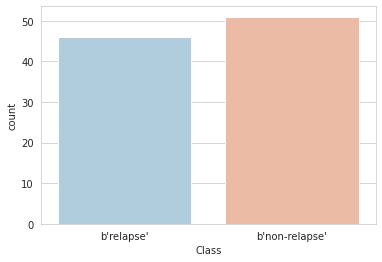

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x = 'Class', data= data1,palette = 'RdBu_r')

In [ ]:
# class values are in byte string format but we need them in integer format
# Converting them into string first
y = data1.Class  # label
# len(y)
# y[0]
def cvt(str):
  return str.decode("utf-8")

for st in range(len(y)):
  y[st] = cvt(y[st])
# print(y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
# Then convert them into integer
y.replace({"non-relapse": 0, "relapse": 1}, inplace= True)

In [ ]:
y = y.astype(float)

In [ ]:
# grab our features
x = data1.drop(['Class'], axis=1)

**Train test split**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_text: ",x_test.shape)
print("y_test: ",y_test.shape)

x_train shape:  (77, 24481)
y_train shape:  (77,)
x_text:  (20, 24481)
y_test:  (20,)


In [ ]:
x_train.shape

(77, 24481)

**Scale the data**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
# x_train = pd.Series(x_train)

### Noramal Classification Methods

#### Classification using SVM

In [ ]:
from sklearn.svm import SVC
model_SVC= SVC()
model_SVC.fit(x_train,y_train)

SVC()

[[6 6]
 [3 5]]


              precision    recall  f1-score   support

         0.0       0.67      0.50      0.57        12
         1.0       0.45      0.62      0.53         8

    accuracy                           0.55        20
   macro avg       0.56      0.56      0.55        20
weighted avg       0.58      0.55      0.55        20



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


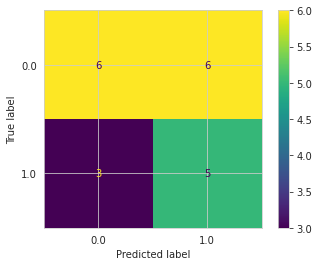

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
model_pred = model_SVC.predict(x_test)
print(confusion_matrix(y_test,model_pred))
print('\n')
print(classification_report(y_test,model_pred))
plot_confusion_matrix(model_SVC, x_test, y_test)

In [ ]:
# Calculate all
precision,recall,f1_score = evaluate_fn(y_test, model_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)

precision :  0.5 
 recall : 0.6666666666666666 
 f1_score : 0.5714285714285715


poor performance because of the too many features and little lenght(only 97 rows) of the dataset.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


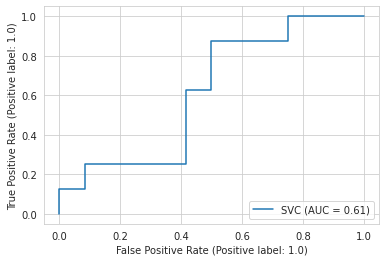

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model_SVC, x_test, y_test)

As we can see we got very poor performance because of those excess features

#### With Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

[[8 4]
 [7 1]]


              precision    recall  f1-score   support

         0.0       0.53      0.67      0.59        12
         1.0       0.20      0.12      0.15         8

    accuracy                           0.45        20
   macro avg       0.37      0.40      0.37        20
weighted avg       0.40      0.45      0.42        20



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


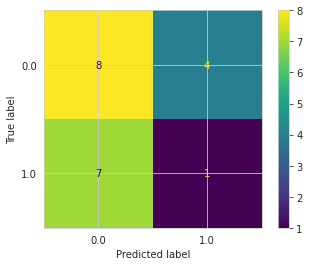

In [ ]:
y_pred = gnb.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))
plot_confusion_matrix(gnb, x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


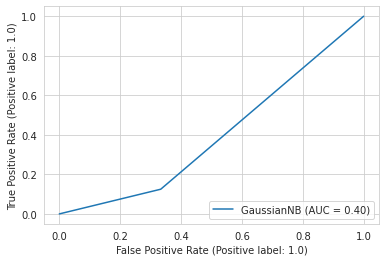

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gnb, x_test, y_test)

In [ ]:
# Calculate all
precision,recall,f1_score = evaluate_fn(y_test, y_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)

precision :  0.6666666666666666 
 recall : 0.5333333333333333 
 f1_score : 0.5925925925925926


#### Decision Tree

In [ ]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_test)

[[5 7]
 [2 6]]


              precision    recall  f1-score   support

         0.0       0.71      0.42      0.53        12
         1.0       0.46      0.75      0.57         8

    accuracy                           0.55        20
   macro avg       0.59      0.58      0.55        20
weighted avg       0.61      0.55      0.54        20



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


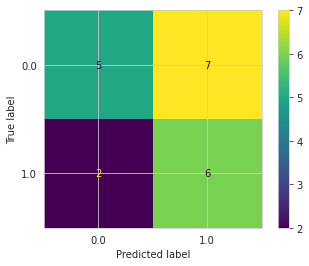

In [ ]:
print(confusion_matrix(y_test,dt_pred))
print('\n')
print(classification_report(y_test,dt_pred))

plot_confusion_matrix(dt, x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


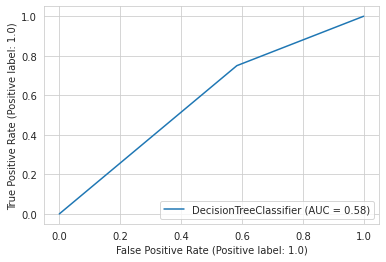

In [ ]:
# ROC curve
plot_roc_curve(dt, x_test, y_test)

In [ ]:
# Calculate all
precision,recall,f1_score = evaluate_fn(y_test, dt_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)

precision :  0.4166666666666667 
 recall : 0.7142857142857143 
 f1_score : 0.5263157894736842


#### LDA

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)
lda_pred = lda.predict(x_test)

[[6 6]
 [2 6]]


              precision    recall  f1-score   support

         0.0       0.75      0.50      0.60        12
         1.0       0.50      0.75      0.60         8

    accuracy                           0.60        20
   macro avg       0.62      0.62      0.60        20
weighted avg       0.65      0.60      0.60        20



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


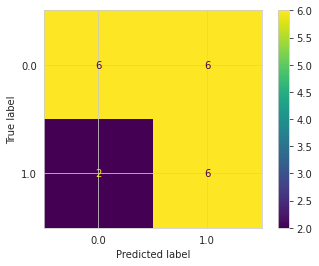

In [ ]:
print(confusion_matrix(y_test,lda_pred))
print('\n')
print(classification_report(y_test,lda_pred))
plot_confusion_matrix(lda, x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


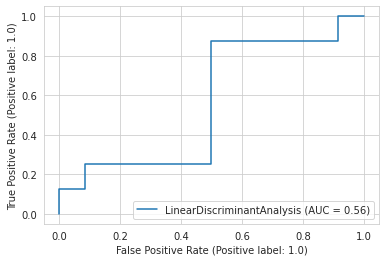

In [ ]:
# ROC curve
plot_roc_curve(lda, x_test, y_test)

In [ ]:
# Calculate all
precision,recall,f1_score = evaluate_fn(y_test, lda_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)

precision :  0.5 
 recall : 0.75 
 f1_score : 0.6


### Wrapper Methods

#### Using sklearn GA

In [ ]:
!pip install sklearn-genetic

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from genetic_selection import GeneticSelectionCV
from sklearn.svm import SVC

In [ ]:
estimators = DecisionTreeClassifier()
models = GeneticSelectionCV(
    estimators, cv=5, verbose=0,
    scoring="accuracy", max_features=30,
    n_population=100, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
models = models.fit(x, y)
print('Feature Selection:', x.columns[models.support_])

Feature Selection: Index(['Contig24903_RC', 'NM_005409', 'NM_004775', 'AL353933',
       'Contig52720_RC', 'Contig37852_RC', 'NM_000633'],
      dtype='object')


In [ ]:
new_fea =  x.columns[models.support_]
new_fea

Index(['Contig24903_RC', 'NM_005409', 'NM_004775', 'AL353933',
       'Contig52720_RC', 'Contig37852_RC', 'NM_000633'],
      dtype='object')

In [ ]:
# scaler_df = sc.fit_transform(x[new_fea])
# df = pd.DataFrame(scaler_df, columns=new_fea.columns)
new_x = x[new_fea]
x_train, x_test, y_train, y_test = train_test_split(new_x, y, test_size=0.10, random_state=101)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

**Using SVM**

In [ ]:
model = SVC()
model.fit(x_train, y_train)
model_pred = model.predict(x_test)

[[3 3]
 [3 1]]


              precision    recall  f1-score   support

         0.0       0.50      0.50      0.50         6
         1.0       0.25      0.25      0.25         4

    accuracy                           0.40        10
   macro avg       0.38      0.38      0.38        10
weighted avg       0.40      0.40      0.40        10



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


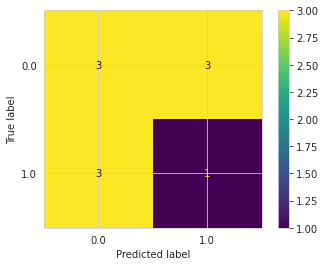

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
print(confusion_matrix(y_test,model_pred))
print('\n')
print(classification_report(y_test,model_pred))
plot_confusion_matrix(model, x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


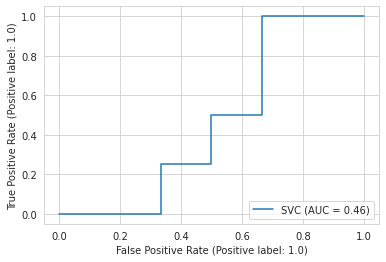

In [ ]:
# ROC curve
plot_roc_curve(model, x_test, y_test)

In [ ]:
# Calculate all
precision,recall,f1_score = evaluate_fn(y_test, model_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)

precision :  0.5 
 recall : 0.5 
 f1_score : 0.5


**Using Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_test)

[[3 3]
 [0 4]]


              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67         6
         1.0       0.57      1.00      0.73         4

    accuracy                           0.70        10
   macro avg       0.79      0.75      0.70        10
weighted avg       0.83      0.70      0.69        10



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


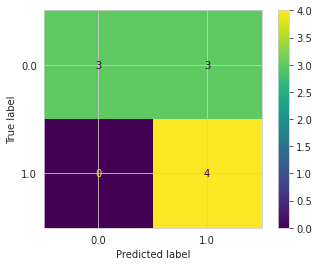

In [ ]:
print(confusion_matrix(y_test,dt_pred))
print('\n')
print(classification_report(y_test,dt_pred))

plot_confusion_matrix(dt, x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


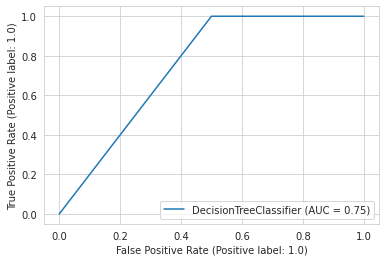

In [ ]:
# ROC curve
plot_roc_curve(dt, x_test, y_test)

In [ ]:
# Calculate all
precision,recall,f1_score = evaluate_fn(y_test, dt_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)

precision :  0.5 
 recall : 1.0 
 f1_score : 0.6666666666666666


**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[6 0]
 [4 0]]


              precision    recall  f1-score   support

         0.0       0.60      1.00      0.75         6
         1.0       0.00      0.00      0.00         4

    accuracy                           0.60        10
   macro avg       0.30      0.50      0.37        10
weighted avg       0.36      0.60      0.45        10



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


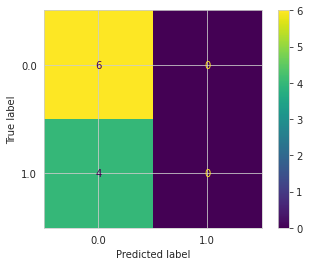

In [ ]:
# Plot the confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gnb, x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


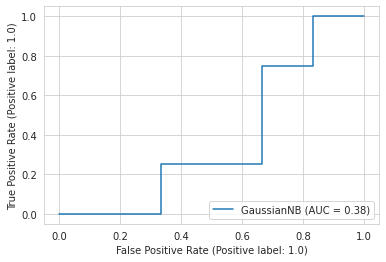

In [ ]:
# ROC curve
plot_roc_curve(gnb, x_test, y_test)

In [ ]:
# Calculate all
precision,recall,f1_score = evaluate_fn(y_test, y_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)

precision :  1.0 
 recall : 0.6 
 f1_score : 0.7499999999999999


**Using LDA**

[[3 3]
 [3 1]]


              precision    recall  f1-score   support

         0.0       0.50      0.50      0.50         6
         1.0       0.25      0.25      0.25         4

    accuracy                           0.40        10
   macro avg       0.38      0.38      0.38        10
weighted avg       0.40      0.40      0.40        10

precision :  0.5 
 recall : 0.5 
 f1_score : 0.5




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


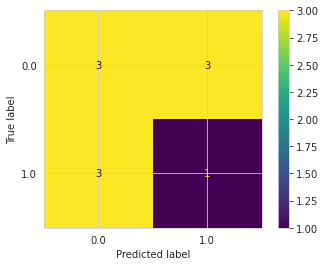

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)
lda_pred = lda.predict(x_test)

print(confusion_matrix(y_test,lda_pred))
print('\n')
print(classification_report(y_test,lda_pred))
plot_confusion_matrix(lda, x_test, y_test)


# Calculate all
precision,recall,f1_score = evaluate_fn(y_test, lda_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)
print('\n')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


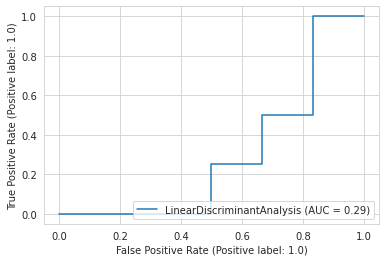

In [ ]:
# ROC curve
plot_roc_curve(lda, x_test, y_test)

#### Using PSO (Particle Swarm Optimization)

In [ ]:
!pip install niapy --pre
!pip install scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from niapy.problems import Problem
from niapy.task import Task
from niapy.algorithms.basic import ParticleSwarmOptimization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
class SVMFeatureSelection(Problem):
    def __init__(self, X_train, y_train, alpha=0.99):
        super().__init__(dimension=X_train.shape[1], lower=0, upper=1)
        self.X_train = X_train
        self.y_train = y_train
        self.alpha = alpha

    def _evaluate(self, x):
        selected = x > 0.5
        num_selected = selected.sum()
        if num_selected == 0:
            return 1.0
        accuracy = cross_val_score(SVC(), self.X_train[:, selected], self.y_train, cv=2, n_jobs=-1).mean()
        score = 1 - accuracy
        num_features = self.X_train.shape[1]
        return self.alpha * score + (1 - self.alpha) * (num_selected / num_features)

**With sklearn Data**

In [ ]:
# dataset = load_breast_cancer()
# X = dataset.data
# y = dataset.target
# feature_names = dataset.feature_names
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1234)
# feature_names

**With Custom Data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

print("x_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
feature_names = x.columns
feature_names

x_train shape:  (77, 24481)
y_train shape:  (77,)


Index(['Contig45645_RC', 'Contig44916_RC', 'D25272', 'J00129',
       'Contig29982_RC', 'Contig26811', 'D25274', 'Contig36292', 'Contig42854',
       'Contig34839',
       ...
       'NM_000895', 'NM_000898', 'NM_000899', 'Contig20164_RC',
       'Contig8985_RC', 'Contig36062_RC', 'Contig35333_RC', 'Contig62037_RC',
       'AF067420', 'Contig15167_RC'],
      dtype='object', length=24481)

In [ ]:
problem = SVMFeatureSelection(X_train, y_train)
task = Task(problem, max_iters=100)
algorithm = ParticleSwarmOptimization(population_size=10, seed=1234)
best_features, best_fitness = algorithm.run(task)

In [ ]:
selected_features = best_features > 0.5
print('Number of selected features:', selected_features.sum())
print('Selected features:', ', '.join(feature_names[selected_features].tolist()))

Number of selected features: 11751
Selected features: D25272, J00129, Contig26811, Contig42854, Contig8376_RC, D49958, Contig40179_RC, Contig27915_RC, Contig44682_RC, Contig35934_RC, Contig46975_RC, AJ236885, Contig42867, Contig25013_RC, Contig20156_RC, AF155652, Contig19662_RC, AF155654, Contig46366_RC, zero_barcode, Contig56678_RC, Contig26832, AF026004, Contig732_RC, Contig26343_RC, Contig53047_RC, Contig51964_RC, Contig19551, Contig27572, Contig21020_RC, Contig42893, Contig47230_RC, Contig21478_RC, Contig45395_RC, X98307, AL157505, D31885, D31886, D31887, AB033006, AB033007, Contig40681_RC, AB033011, AB033015, AB033019, Contig10429_RC, Contig47222_RC, Contig58263_RC, Contig37368_RC, Contig29349_RC, Contig49890_RC, AB033024, AB033025, AB033026, AB033027, AB033028, AF114263, Contig64215_RC, Contig49281_RC, Contig48552_RC, Contig34947_RC, AB033030, AB033031, AB033032, AB033035, Contig27800_RC, Contig46860_RC, Contig38841_RC, AB033040, AB033041, AB033046, Contig42500_RC, AB033049, Cont

In [ ]:
print("Num of features gonna use here is:", len(feature_names[selected_features]))
X_train[:, selected_features].shape

Num of features gonna use here is: 11751


(77, 11751)

**Using SVM**

In [ ]:
model_selected = SVC()
model_all = SVC()
X_train = sc.fit_transform(X_train[:, selected_features])
X_test = sc.transform(X_test[:, selected_features])
model_selected.fit(X_train, y_train)
print('Subset accuracy:', model_selected.score(X_test, y_test))

model_all.fit(X_train, y_train)
print('All Features Accuracy:', model_all.score(X_test, y_test))

Subset accuracy: 0.55
All Features Accuracy: 0.55


[[6 6]
 [3 5]]


              precision    recall  f1-score   support

         0.0       0.67      0.50      0.57        12
         1.0       0.45      0.62      0.53         8

    accuracy                           0.55        20
   macro avg       0.56      0.56      0.55        20
weighted avg       0.58      0.55      0.55        20





/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


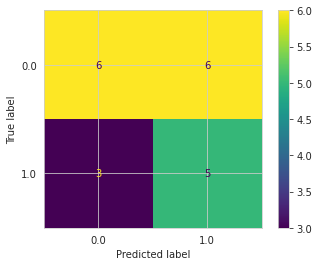

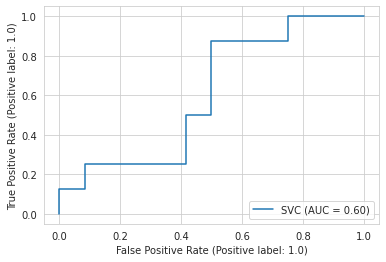

In [ ]:
# plot confusion matrix
model_pred = model_selected.predict(X_test)
print(confusion_matrix(y_test,model_pred))
print('\n')
print(classification_report(y_test,model_pred))
plot_confusion_matrix(model_selected, X_test, y_test)
print("\n")
# ROC curve
plot_roc_curve(model_selected, X_test, y_test)

In [ ]:
# Calculate all
model_pred = model_selected.predict(X_test)
precision,recall,f1_score = evaluate_fn(y_test, model_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)

precision :  0.5 
 recall : 0.6666666666666666 
 f1_score : 0.5714285714285715


**Using Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_sel = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_all = DecisionTreeClassifier(criterion='entropy', random_state=0)
# X_train = sc.fit_transform(X_train[:, selected_features])
# X_test = sc.transform(X_test[:, selected_features])
dt_sel.fit(X_train, y_train)
print('Subset accuracy:', dt_sel.score(X_test, y_test))

dt_all.fit(X_train, y_train)
print('All Features Accuracy:', dt_all.score(X_test, y_test))

Subset accuracy: 0.65
All Features Accuracy: 0.65


[[7 5]
 [2 6]]


              precision    recall  f1-score   support

         0.0       0.78      0.58      0.67        12
         1.0       0.55      0.75      0.63         8

    accuracy                           0.65        20
   macro avg       0.66      0.67      0.65        20
weighted avg       0.68      0.65      0.65        20



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


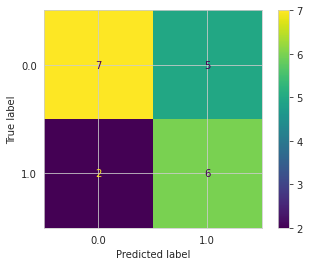

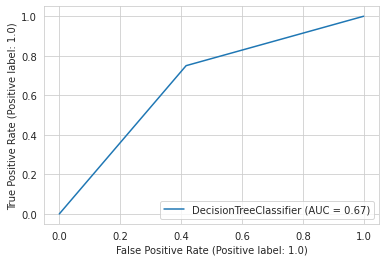

In [ ]:
# plot confusion matrix
model_pred = dt_sel.predict(X_test)
print(confusion_matrix(y_test,model_pred))
print('\n')
print(classification_report(y_test,model_pred))
plot_confusion_matrix(dt_sel, X_test, y_test)
print("\n")
# ROC curve
plot_roc_curve(dt_sel, X_test, y_test)

In [ ]:
# Calculate all
model_pred = dt_sel.predict(X_test)
precision,recall,f1_score = evaluate_fn(y_test, model_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)

precision :  0.5833333333333334 
 recall : 0.7777777777777778 
 f1_score : 0.6666666666666666


**Using Naive Bayes**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

gnb_sel = GaussianNB()
gnb_all = GaussianNB()
# X_train = sc.fit_transform(X_train[:, selected_features])
# X_test = sc.transform(X_test[:, selected_features])
gnb_sel.fit(X_train, y_train)
print('Subset accuracy:', gnb_sel.score(X_test, y_test))

gnb_all.fit(X_train, y_train)
print('All Features Accuracy:', gnb_all.score(X_test, y_test))

Subset accuracy: 0.4
All Features Accuracy: 0.4


[[7 5]
 [7 1]]


              precision    recall  f1-score   support

         0.0       0.50      0.58      0.54        12
         1.0       0.17      0.12      0.14         8

    accuracy                           0.40        20
   macro avg       0.33      0.35      0.34        20
weighted avg       0.37      0.40      0.38        20



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


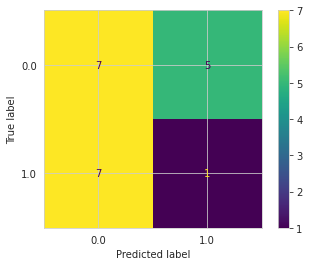

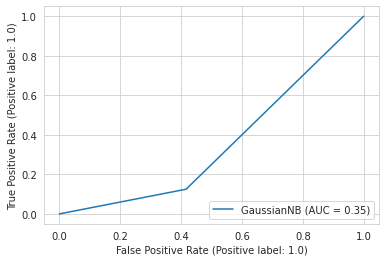

In [ ]:
# plot confusion matrix
model_pred = gnb_sel.predict(X_test)
print(confusion_matrix(y_test,model_pred))
print('\n')
print(classification_report(y_test,model_pred))
plot_confusion_matrix(gnb_sel, X_test, y_test)
print("\n")
# ROC curve
plot_roc_curve(gnb_sel, X_test, y_test)

In [ ]:
# Calculate all
model_pred = gnb_sel.predict(X_test)
precision,recall,f1_score = evaluate_fn(y_test, model_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)

precision :  0.5833333333333334 
 recall : 0.5 
 f1_score : 0.5384615384615384


**Using LDA**

In [ ]:
lda_sel = LinearDiscriminantAnalysis()
lda_all = LinearDiscriminantAnalysis()
lda_sel.fit(X_train, y_train)
print('Subset accuracy:', lda_sel.score(X_test, y_test))

lda_all.fit(X_train, y_train)
print('All Features Accuracy:', lda_all.score(X_test, y_test))

Subset accuracy: 0.65
All Features Accuracy: 0.65


[[7 5]
 [2 6]]


              precision    recall  f1-score   support

         0.0       0.78      0.58      0.67        12
         1.0       0.55      0.75      0.63         8

    accuracy                           0.65        20
   macro avg       0.66      0.67      0.65        20
weighted avg       0.68      0.65      0.65        20





/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


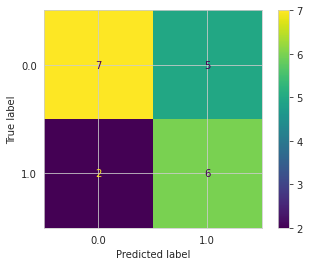

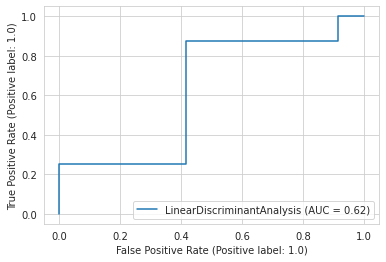

In [ ]:
# plot confusion matrix
model_pred = lda_sel.predict(X_test)
print(confusion_matrix(y_test,model_pred))
print('\n')
print(classification_report(y_test,model_pred))
plot_confusion_matrix(lda_sel, X_test, y_test)
print("\n")
# ROC curve
plot_roc_curve(lda_sel, X_test, y_test)

In [ ]:
# Calculate all
model_pred = lda_sel.predict(X_test)
precision,recall,f1_score = evaluate_fn(y_test, model_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)

precision :  0.5833333333333334 
 recall : 0.7777777777777778 
 f1_score : 0.6666666666666666


#### FA-SVM

In [ ]:
!git clone "https://github.com/JingweiToo/Wrapper-Feature-Selection-Toolbox-Python.git"

Cloning into 'Wrapper-Feature-Selection-Toolbox-Python'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 163 (delta 38), reused 59 (delta 36), pack-reused 102
Receiving objects: 100% (163/163), 81.51 KiB | 907.00 KiB/s, done.
Resolving deltas: 100% (101/101), done.


In [ ]:
%cd "Wrapper-Feature-Selection-Toolbox-Python"

/content/Wrapper-Feature-Selection-Toolbox-Python


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from FS.fa import jfs

In [ ]:
# grab our features
y = data1.Class
y = y.values
x = data1.drop(['Class'], axis= 1)
# x = x.values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_text: ",x_test.shape)
print("y_test: ",y_test.shape)

x_train shape:  (77, 24481)
y_train shape:  (77,)
x_text:  (20, 24481)
y_test:  (20,)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:

# x = x.values
# y = y.values
k = 5
alpha  = 1       # constant
beta0  = 1       # light amplitude
gamma  = 1       # absorbtion coefficient
theta  = 0.97    # control alpha

N = 10 # number of particles
T = 100   # maximum number of iterations
fold = {'xt':x_train, 'yt':y_train, 'xv':x_test, 'yv':y_test}
x = x.values
opts = {'k':k,'fold':fold, 'N':N, 'T':T, 'alpha':alpha, 'beta0':beta0, 'gamma':gamma, 'theta':theta}

In [ ]:

print(type(x))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
# perform feature selection
fmdl = jfs(x, y, opts)
sf   = fmdl['sf']

In [ ]:
# model with selected features
num_train = np.size(x_train, 0)
num_valid = np.size(x_test, 0)
x_train   = x_train[:, sf]
y_train   = y_train.reshape(num_train)  # Solve bug
x_valid   = x_test[:, sf]
y_valid   = y_test.reshape(num_valid)  # Solve bug

In [ ]:
# Model
model = SVC()
model.fit(x_train,y_train)
model_pred = model.predict(x_valid)

[[6 6]
 [3 5]]


              precision    recall  f1-score   support

           0       0.67      0.50      0.57        12
           1       0.45      0.62      0.53         8

    accuracy                           0.55        20
   macro avg       0.56      0.56      0.55        20
weighted avg       0.58      0.55      0.55        20



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


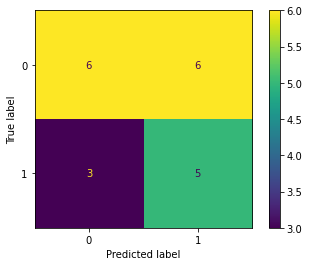

In [ ]:
print(confusion_matrix(y_valid,model_pred))
print('\n')
print(classification_report(y_valid,model_pred))
plot_confusion_matrix(model, x_valid, y_valid)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


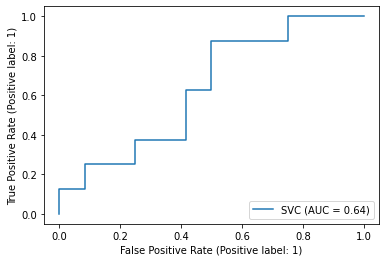

In [ ]:
# ROC curve
plot_roc_curve(model, x_valid, y_valid)

In [ ]:
# Calculate all
precision,recall,f1_score = evaluate_fn(y_valid, model_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)

precision :  0.5 
 recall : 0.6666666666666666 
 f1_score : 0.5714285714285715


In [ ]:
# Lets see with LDA Classifier
lda_sel = LinearDiscriminantAnalysis()
lda_all = LinearDiscriminantAnalysis()
lda_sel.fit(x_train, y_train)
print('Subset accuracy:', lda_sel.score(x_valid, y_valid))

lda_all.fit(x_train, y_train)
print('All Features Accuracy:', lda_all.score(x_valid, y_valid))

Subset accuracy: 0.65
All Features Accuracy: 0.65


[[7 5]
 [2 6]]


              precision    recall  f1-score   support

           0       0.78      0.58      0.67        12
           1       0.55      0.75      0.63         8

    accuracy                           0.65        20
   macro avg       0.66      0.67      0.65        20
weighted avg       0.68      0.65      0.65        20



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


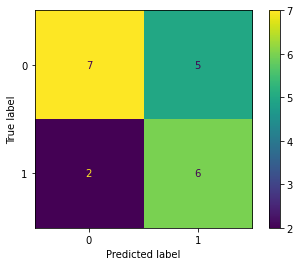

In [ ]:
lda_pred = lda_sel.predict(x_valid)
print(confusion_matrix(y_valid,lda_pred))
print('\n')
print(classification_report(y_valid,lda_pred))
plot_confusion_matrix(lda_sel, x_valid, y_valid)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


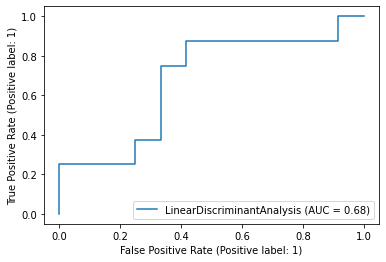

In [ ]:
# ROC curve
plot_roc_curve(lda_sel, x_valid, y_valid)

In [ ]:
# Calculate all

precision,recall,f1_score = evaluate_fn(y_valid, lda_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)

precision :  0.5833333333333334 
 recall : 0.7777777777777778 
 f1_score : 0.6666666666666666


#### With JAYA Algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from FS.ja import jfs   # change this to switch algorithm

In [ ]:

# grab our features
# y = data['diagnosis']
x = data1.drop(['Class'], axis= 1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_text: ",x_test.shape)
print("y_test: ",y_test.shape)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

x_train shape:  (77, 24481)
y_train shape:  (77,)
x_text:  (20, 24481)
y_test:  (20,)


In [ ]:
# parameter
k    = 5     # k-value in KNN
N    = 10    # number of chromosomes
T    = 100   # maximum number of generations
CR   = 0.8
MR   = 0.01
fold = {'xt':x_train, 'yt':y_train, 'xv':x_test, 'yv':y_test}
x = x.to_numpy()
opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'CR':CR, 'MR':MR}


In [ ]:
# y = y.values
print(type(x))
print(type(y))

In [ ]:
# perform feature selection
fmdl = jfs(x, y, opts)
sf   = fmdl['sf']

Generation: 1
Best (JA): 0.4504323965524284
Generation: 2
Best (JA): 0.4009385237531147
Generation: 3
Best (JA): 0.4009385237531147
Generation: 4
Best (JA): 0.4009385237531147
Generation: 5
Best (JA): 0.4009385237531147
Generation: 6
Best (JA): 0.4009385237531147
Generation: 7
Best (JA): 0.4009385237531147
Generation: 8
Best (JA): 0.4009385237531147
Generation: 9
Best (JA): 0.4009385237531147
Generation: 10
Best (JA): 0.4009385237531147
Generation: 11
Best (JA): 0.4009385237531147
Generation: 12
Best (JA): 0.4009136064703239
Generation: 13
Best (JA): 0.4009131979902782
Generation: 14
Best (JA): 0.4009131979902782
Generation: 15
Best (JA): 0.4009131979902782
Generation: 16
Best (JA): 0.400907070789592
Generation: 17
Best (JA): 0.4008919570278992
Generation: 18
Best (JA): 0.400880928066664
Generation: 19
Best (JA): 0.400880928066664
Generation: 20
Best (JA): 0.400880928066664
Generation: 21
Best (JA): 0.400880928066664
Generation: 22
Best (JA): 0.40087357542584046
Generation: 23
Best (JA

In [ ]:
# model with selected features
num_train = np.size(x_train, 0)
num_valid = np.size(x_test, 0)
x_train   = x_train[:, sf]
y_train   = y_train.reshape(num_train)  # Solve bug
x_valid   = x_test[:, sf]
y_valid   = y_test.reshape(num_valid)  # Solve bug

In [ ]:
# Model
model = SVC()
model.fit(x_train,y_train)
model_pred = model.predict(x_valid)

[[6 6]
 [3 5]]


              precision    recall  f1-score   support

           0       0.67      0.50      0.57        12
           1       0.45      0.62      0.53         8

    accuracy                           0.55        20
   macro avg       0.56      0.56      0.55        20
weighted avg       0.58      0.55      0.55        20



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


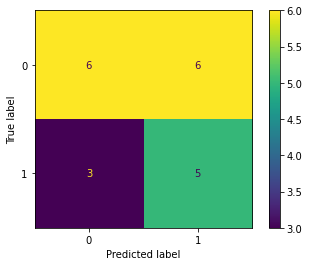

In [ ]:
print(confusion_matrix(y_valid,model_pred))
print('\n')
print(classification_report(y_valid,model_pred))
plot_confusion_matrix(model, x_valid, y_valid)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


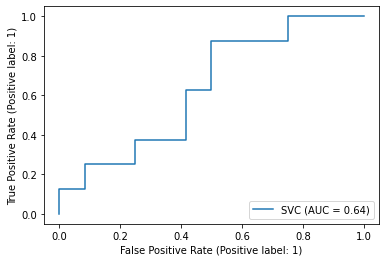

In [ ]:
# ROC curve
plot_roc_curve(model, x_valid, y_valid)

In [ ]:
# Calculate all
precision,recall,f1_score = evaluate_fn(y_valid, model_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)

precision :  0.5 
 recall : 0.6666666666666666 
 f1_score : 0.5714285714285715


In [ ]:
%cd ..

/content


### With Filters

* IG - Information Gain
* Chi2
* MRMR
* Relieff

#### Information Gain

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
x = data1.drop(['Class'], axis = 1)

In [ ]:
mf = mutual_info_classif(x,y)
mf.shape
print(mf)

[0.0046985  0.04246188 0.00458257 ... 0.03413324 0.02545283 0.        ]


In [ ]:
mf = pd.Series(mf)
mf.index = x.columns

In [ ]:
mf.sort_values(ascending=False)

Contig15778_RC    0.273300
NM_005333         0.235289
NM_013955         0.233981
Contig31033_RC    0.233560
Contig24311_RC    0.220196
                    ...   
NM_005360         0.000000
Contig51775_RC    0.000000
NM_004630         0.000000
NM_003901         0.000000
Contig15167_RC    0.000000
Length: 24481, dtype: float64

In [ ]:
# !pip install ITMO-FS
# !pip install ibmdbpy
from sklearn.feature_selection import SelectKBest
sub_cols = SelectKBest(mutual_info_classif, k=100)
sub_cols.fit(x,y)
x.columns[sub_cols.get_support()]

Index(['Contig25013_RC', 'Contig35692_RC', 'AB033024', 'AB033031', 'AB033032',
       'Contig24026_RC', 'Contig46860_RC', 'AB033053', 'Contig28521_RC',
       'AB033062',
       ...
       'Contig50900_RC', 'NM_018958', 'NM_000841', 'NM_000842', 'NM_018964',
       'Contig38980_RC', 'NM_000850', 'Contig27788_RC', 'NM_000875',
       'Contig30109_RC'],
      dtype='object', length=1000)

In [ ]:
# Our features selected by IG
ig_features = x.columns[sub_cols.get_support()]
len(ig_features)

1000

In [ ]:
new_x = x[x.columns[sub_cols.get_support()]]
print(new_x.shape)
print(y.shape)

(97, 1000)
(97,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(new_x, y, test_size = 0.2, random_state = 101)
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)

x_train shape:  (77, 1000)
y_train shape:  (77,)


In [ ]:
# Data scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [ ]:
from sklearn.svm import SVC
model_SVC= SVC()
model_SVC.fit(X_train,y_train)
model_pred = model_SVC.predict(X_test)

[[6 6]
 [1 7]]


              precision    recall  f1-score   support

           0       0.86      0.50      0.63        12
           1       0.54      0.88      0.67         8

    accuracy                           0.65        20
   macro avg       0.70      0.69      0.65        20
weighted avg       0.73      0.65      0.65        20



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


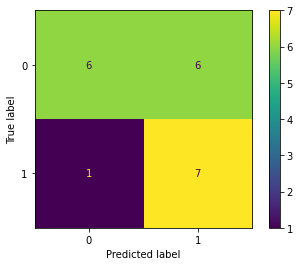

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,model_pred))
print('\n')
print(classification_report(y_test,model_pred))
plot_confusion_matrix(model_SVC, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


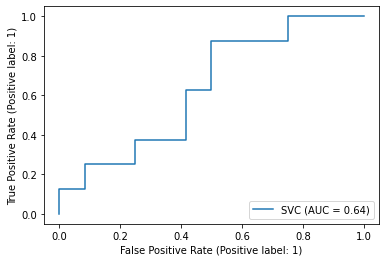

In [ ]:
plot_roc_curve(model_SVC, X_test, y_test)

In [ ]:
# Calculate all
precision,recall,f1_score = evaluate_fn(y_test, model_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)

precision :  0.5 
 recall : 0.8571428571428571 
 f1_score : 0.631578947368421


#### Chi2 Squre

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [ ]:
x = data1.drop(['Class'], axis=1)
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
new_x = sc.fit_transform(x)

In [ ]:
k = 100 #tells ten top features to be selected
# Score function Chi2 tells the feature to be selected using Chi Square
test = SelectKBest(score_func=chi2, k=k)
test.fit(new_x, y)
chi2_features = x.columns[test.get_support()]
chi2_features

Index(['Contig35026_RC', 'Contig36064_RC', 'AB032960', 'Contig42942_RC',
       'AL117508', 'AL133575', 'Contig42059_RC', 'Contig13663_RC', 'AL133616',
       'Contig39970_RC', 'Contig8629_RC', 'NM_005323', 'NM_013345',
       'NM_014095', 'NM_020676', 'NM_005383', 'Contig35903_RC',
       'Contig5690_RC', 'Contig39638_RC', 'NM_006105', 'NM_014155',
       'NM_005420', 'NM_005425', 'NM_006174', 'Contig39150_RC',
       'Contig33441_RC', 'Contig29165_RC', 'NM_006217', 'Contig16416_RC',
       'Contig20176_RC', 'Contig27326_RC', 'Contig32073_RC', 'AB029029',
       'Contig26232_RC', 'Contig36887_RC', 'NM_020974', 'AK000053',
       'NM_004985', 'AL080059', 'Contig25693_RC', 'Contig26291_RC',
       'Contig18492_RC', 'Contig12440_RC', 'Contig45932_RC', 'Contig6362_RC',
       'NM_007252', 'NM_014565', 'Contig30402', 'Contig34367_RC',
       'Contig2087_RC', 'Contig37508_RC', 'Contig23211_RC', 'Contig44564_RC',
       'NM_014625', 'NM_006658', 'Contig39984', 'Contig26915_RC',
       'Conti

In [ ]:
fit = x[chi2_features]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(fit, y, test_size = 0.2, random_state = 101)
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

x_train shape:  (77, 100)
y_train shape:  (77,)


[[8 4]
 [2 6]]


              precision    recall  f1-score   support

         0.0       0.80      0.67      0.73        12
         1.0       0.60      0.75      0.67         8

    accuracy                           0.70        20
   macro avg       0.70      0.71      0.70        20
weighted avg       0.72      0.70      0.70        20



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


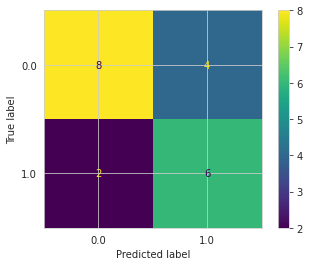

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix


model_SVC= SVC()
model_SVC.fit(X_train,y_train)

model_pred = model_SVC.predict(X_test)
print(confusion_matrix(y_test,model_pred))
print('\n')
print(classification_report(y_test,model_pred))
plot_confusion_matrix(model_SVC, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


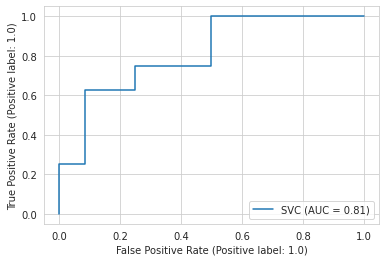

In [ ]:
plot_roc_curve(model_SVC, X_test, y_test)

In [ ]:
# Calculate all
precision,recall,f1_score = evaluate_fn(y_test, model_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)

precision :  0.6666666666666666 
 recall : 0.8 
 f1_score : 0.7272727272727272


#### MRMR

In [ ]:
!pip install pymrmr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 5.1 MB/s 
  Created wheel for pymrmr: filename=pymrmr-0.1.11-cp37-cp37m-linux_x86_64.whl size=276663 sha256=b3646743139b8794ea96aa2d52df5f28daecb67a9cf2a6afa95d8e48b6e95753
  Stored in directory: /root/.cache/pip/wheels/81/95/66/05731ac334bc74a1251a727af18eb28dc027217ee817a0cab6
Successfully built pymrmr


In [ ]:
import pymrmr
mrmr_features = pymrmr.mRMR(x, 'MIQ', 100)

In [ ]:
new_x = x[mrmr_features]
new_x.head()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(new_x, y, test_size = 0.2, random_state = 101)
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)

x_train shape:  (455, 10)
y_train shape:  (455,)


In [ ]:
from sklearn.svm import SVC
model_SVC= SVC()
model_SVC.fit(x_train,y_train)

SVC()

[[72  0]
 [ 6 36]]


              precision    recall  f1-score   support

           0       0.92      1.00      0.96        72
           1       1.00      0.86      0.92        42

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


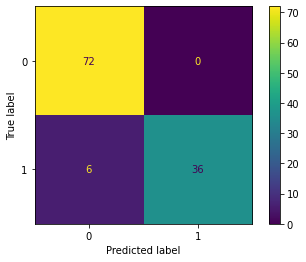

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
model_pred = model_SVC.predict(x_test)
print(confusion_matrix(y_test,model_pred))
print('\n')
print(classification_report(y_test,model_pred))
plot_confusion_matrix(model_SVC, x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


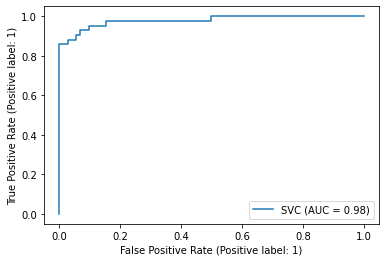

In [ ]:
plot_roc_curve(model_SVC, x_test, y_test)

In [ ]:
# Calculate all
precision,recall,f1_score = evaluate_fn(y_test, model_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)

precision :  1.0 
 recall : 0.9230769230769231 
 f1_score : 0.9600000000000001


#### ReliefF

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances


In [ ]:
def reliefF(X, y, **kwargs):
    """
    This function implements the reliefF feature selection
    Input
    -----
    X: {numpy array}, shape (n_samples, n_features)
        input data
    y: {numpy array}, shape (n_samples,)
        input class labels
    kwargs: {dictionary}
        parameters of reliefF:
        k: {int}
            choices for the number of neighbors (default k = 5)
    Output
    ------
    score: {numpy array}, shape (n_features,)
        reliefF score for each feature
    Reference
    ---------
    Robnik-Sikonja, Marko et al. "Theoretical and empirical analysis of relieff and rrelieff." Machine Learning 2003.
    Zhao, Zheng et al. "On Similarity Preserving Feature Selection." TKDE 2013.
    """

    if "k" not in kwargs.keys():
        k = 5
    else:
        k = kwargs["k"]
    n_samples, n_features = X.shape

    # calculate pairwise distances between instances
    distance = pairwise_distances(X, metric='manhattan')

    score = np.zeros(n_features)

    # the number of sampled instances is equal to the number of total instances
    for idx in range(n_samples):
        near_hit = []
        near_miss = dict()

        self_fea = X[idx, :]
        c = np.unique(y).tolist()

        stop_dict = dict()
        for label in c:
            stop_dict[label] = 0
        del c[c.index(y[idx])]

        p_dict = dict()
        p_label_idx = float(len(y[y == y[idx]]))/float(n_samples)

        for label in c:
            p_label_c = float(len(y[y == label]))/float(n_samples)
            p_dict[label] = p_label_c/(1-p_label_idx)
            near_miss[label] = []

        distance_sort = []
        distance[idx, idx] = np.max(distance[idx, :])

        for i in range(n_samples):
            distance_sort.append([distance[idx, i], int(i), y[i]])
        distance_sort.sort(key=lambda x: x[0])

        for i in range(n_samples):
            # find k nearest hit points
            if distance_sort[i][2] == y[idx]:
                if len(near_hit) < k:
                    near_hit.append(distance_sort[i][1])
                elif len(near_hit) == k:
                    stop_dict[y[idx]] = 1
            else:
                # find k nearest miss points for each label
                if len(near_miss[distance_sort[i][2]]) < k:
                    near_miss[distance_sort[i][2]].append(distance_sort[i][1])
                else:
                    if len(near_miss[distance_sort[i][2]]) == k:
                        stop_dict[distance_sort[i][2]] = 1
            stop = True
            for (key, value) in stop_dict.items():
                    if value != 1:
                        stop = False
            if stop:
                break

        # update reliefF score
        near_hit_term = np.zeros(n_features)
        for ele in near_hit:
            near_hit_term = np.array(abs(self_fea-X[ele, :]))+np.array(near_hit_term)

        near_miss_term = dict()
        for (label, miss_list) in near_miss.items():
            near_miss_term[label] = np.zeros(n_features)
            for ele in miss_list:
                near_miss_term[label] = np.array(abs(self_fea-X[ele, :]))+np.array(near_miss_term[label])
            score += near_miss_term[label]/(k*p_dict[label])
        score -= near_hit_term/k
    return score



In [ ]:
def feature_ranking(score):
    """
    Rank features in descending order according to reliefF score, the higher the reliefF score, the more important the
    feature is
    """
    idx = np.argsort(score, 0)
    return idx[::-1]

In [ ]:

sc = StandardScaler()
X = sc.fit_transform(x)
score = reliefF(X,y)
print(score)
features = feature_ranking(score)

[254.39032264 200.07750823 252.91087754 247.27037674 100.03014521
  77.0800256  180.29322258 223.3336261   56.04344154  91.42809017
 175.11461131  77.90516915 148.70352232 174.94286271  90.11665372
  39.81815585  59.80770494  66.25009336  89.9879412   55.49833053
 327.59209609 298.13115652 315.26838549 302.17682738 163.23767029
 103.38411628 188.67706861 254.96556352  93.46339215  56.4312569 ]


In [ ]:
print(len(features))
print(type(features))
print(features)

30
<class 'numpy.ndarray'>
[20 22 23 21 27  0  2  3  7  1 26  6 10 13 24 12 25  4 28  9 14 18 11  5
 17 16 29  8 19 15]


now we got our score for all features. So lets take 10 of them

In [ ]:
# def filter_where(arr, k):
#     return arr[np.where(arr > k)]
# def find_top_ten(arr,n):
  # sorted array
  # sorted_index_array = np.argsort(arr)
  # sorted_array = arr[sorted_index_array]
  # take n largest value
  # rslt = arr.argsort()[-n:][::-1]
  # return rslt

In [ ]:
feat_top_thou = features[:100]
feat_top_thou

array([20, 22, 23, 21, 27,  0,  2,  3,  7,  1])

got the indexes now we just need to grab the corresponding columns

In [ ]:
relieff_features = []
for key, val in col_dict.items():
  if key in feat_top_thou:
    relieff_features.append(col_dict.get(key))

In [ ]:
# These are the selected features that we gonna use for training
relieff_features

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'concave points_mean',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'concave points_worst']

In [ ]:
# grab the train set
x = data1.drop(['Class'], axis= 1)
# filter out selected features
new_x = x[relieff_features]
new_x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,concave points_mean,radius_worst,texture_worst,perimeter_worst,area_worst,concave points_worst
0,17.99,10.38,122.80,1001.0,0.14710,25.38,17.33,184.60,2019.0,0.2654
1,20.57,17.77,132.90,1326.0,0.07017,24.99,23.41,158.80,1956.0,0.1860
2,19.69,21.25,130.00,1203.0,0.12790,23.57,25.53,152.50,1709.0,0.2430
3,11.42,20.38,77.58,386.1,0.10520,14.91,26.50,98.87,567.7,0.2575
4,20.29,14.34,135.10,1297.0,0.10430,22.54,16.67,152.20,1575.0,0.1625


In [ ]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(new_x, y, test_size = 0.2, random_state = 101)
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

x_train shape:  (455, 10)
y_train shape:  (455,)


In [ ]:
from sklearn.svm import SVC
model_SVC= SVC()
model_SVC.fit(x_train,y_train)

SVC()

[[71  1]
 [ 1 41]]


              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


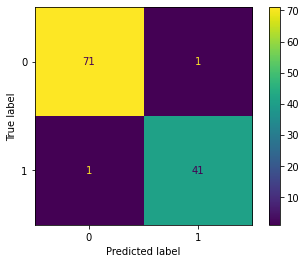

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
model_pred = model_SVC.predict(x_test)
print(confusion_matrix(y_test,model_pred))
print('\n')
print(classification_report(y_test,model_pred))
plot_confusion_matrix(model_SVC, x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


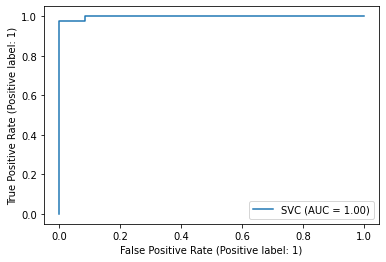

In [ ]:
plot_roc_curve(model_SVC, x_test, y_test)

In [ ]:
# Calculate all
precision,recall,f1_score = evaluate_fn(y_test, model_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)

precision :  0.9861111111111112 
 recall : 0.9861111111111112 
 f1_score : 0.9861111111111112


#### Final

In [ ]:
print("ig_features:",ig_features)
print("chi2_features:",chi2_features)
print("mrmr_features:",mrmr_features)
print("relieff_features:",relieff_features)

ig_features: Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'area_se', 'radius_worst', 'perimeter_worst',
       'area_worst', 'concave points_worst'],
      dtype='object')
chi2_features: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'perimeter_se', 'area_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst'],
      dtype='object')
mrmr_features: ['area_mean', 'radius_worst', 'perimeter_mean', 'radius_se', 'area_worst', 'perimeter_worst', 'area_se', 'perimeter_se', 'compactness_worst', 'concavity_worst']
relieff_features: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'concave points_mean', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']


In [ ]:
# filtered_features = ig_features + chi2_features + mrmr_features + relieff_features
# filtered_features = set(filtered_features)
filtered_features = []
filtered_features.extend(ig_features)
filtered_features.extend(chi2_features)
filtered_features.extend(mrmr_features)
filtered_features.extend(relieff_features)
print("Before Removing Duplicates:")
print(len(filtered_features))
print(filtered_features)
print("\nAfter Removing Duplicates:")
filtered_features = set(filtered_features)
print(len(filtered_features))
print(filtered_features)

Before Removing Duplicates:
40
['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst', 'concave points_worst', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'area_mean', 'radius_worst', 'perimeter_mean', 'radius_se', 'area_worst', 'perimeter_worst', 'area_se', 'perimeter_se', 'compactness_worst', 'concavity_worst', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'concave points_mean', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']

After Removing Duplicates:
16
{'concave points_mean', 'texture_worst', 'radius_mean', 'concave points_worst', 'compactness_worst', 'concavity_worst', 'radius_worst', 'perimeter_worst', 'texture_mean', 'perimeter_se', 'radius_se', 'concavity_mean', 'area_se', 'area_worst', 'area_mean', 'perimeter_mean'}


In [ ]:
# Now last classification
new_x = x[filtered_features]

x_train, x_test, y_train, y_test = train_test_split(new_x, y, test_size = 0.2, random_state = 101)
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

x_train shape:  (455, 16)
y_train shape:  (455,)


[[71  1]
 [ 1 41]]


              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


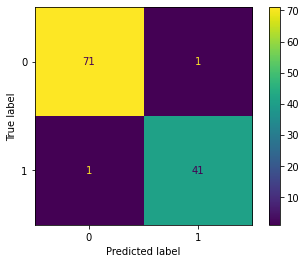

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix


model_SVC= SVC()
model_SVC.fit(X_train,y_train)

model_pred = model_SVC.predict(X_test)
print(confusion_matrix(y_test,model_pred))
print('\n')
print(classification_report(y_test,model_pred))
plot_confusion_matrix(model_SVC, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


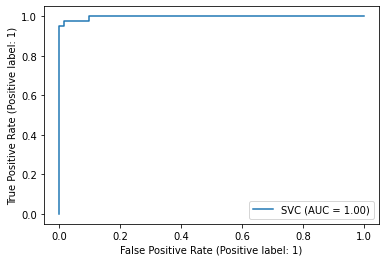

In [ ]:
plot_roc_curve(model_SVC, X_test, y_test)

In [ ]:
# Calculate all
precision,recall,f1_score = evaluate_fn(y_test, model_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)

precision :  0.9861111111111112 
 recall : 0.9861111111111112 
 f1_score : 0.9861111111111112


# Great Job!!